In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn import preprocessing
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import svm
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report,roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.model_selection import RandomizedSearchCV

from time import time
from joblib import dump
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout
from scikeras.wrappers import KerasRegressor 
from sklearn.model_selection import GridSearchCV


from sklearn.dummy import DummyRegressor

from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from catboost import CatBoostRegressor

from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from xgboost import XGBRegressor

from sklearn.svm import SVR
from sklearn.svm import LinearSVR

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize

#from skopt import BayesSearchCV
#from skopt.space import Real, Categorical, Integer


In [23]:
df=pd.read_csv('ml_dataset3.csv')
df_rounded=df

In [24]:
x=df_rounded[['Speed (mm/s)','Flowrate (Hz)']]
y=df_rounded['total_print_deviation']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, 
                                                    random_state=42)

print(X_train.shape)
print(X_test.shape)

(175, 2)
(44, 2)


In [26]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=42)


In [27]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [28]:
X_train = normalize(X_train)
X_val = normalize(X_val)
X_test = normalize(X_test)

In [29]:
def instantiate_model(model_name):
    model = model_name()
    return model

def fit_model(model, X_train, y_train):
    ti = time()
    model = instantiate_model(model)
    model.fit(X_train, y_train)
    fit_time = time() - ti
    return model, fit_time

def evaluate_model(model, X, y_act):
    y_pred = model.predict(X)
    r2 = r2_score(y_act, y_pred)
    mae = mean_absolute_error(y_act, y_pred)
    rmse_val = mean_squared_error(y_act, y_pred, squared=False)
    return r2, mae, rmse_val

def fit_evaluate_model(model, model_name, X_train, y_train, X_val, y_act_val):
    model, fit_time = fit_model(model, X_train, y_train)
    r2_train, mae_train, rmse_train = evaluate_model(model, X_train, y_train)
    r2_val, mae_val, rmse_val = evaluate_model(model, X_val, y_act_val)
    result_dict = {
        'model_name': model_name,
        'model_name_pretty': type(model).__name__,
        'model_params': model.get_params(),
        'fit_time': fit_time,
        'r2_train': r2_train,
        'mae_train': mae_train,
        'rmse_train': rmse_train,
        'r2_val': r2_val,
        'mae_val': mae_val,
        'rmse_val': rmse_val}
    return model, result_dict

def append_result_df(df, result_dict):
    df_result_appended = df.append(result_dict, ignore_index=True)
    return df_result_appended

def append_model_dict(dic, model_name, model):
    dic[model_name] = model
    return dic

In [30]:
df_classics = pd.DataFrame(columns=['model_name',
                                    'model_name_pretty',
                                    'model_params',
                                    'fit_time',
                                    'r2_train',
                                    'mae_train',
                                    'rmse_train',
                                    'r2_val',
                                    'mae_val',
                                    'rmse_val'])
df_classics

,model_name,model_name_pretty,model_params,fit_time,r2_train,mae_train,rmse_train,r2_val,mae_val,rmse_val


In [31]:
# Build a dictionary of model names
from collections import OrderedDict
classic_model_names = OrderedDict({
    'dumr': DummyRegressor,
    'rr': Ridge,
    'abr': AdaBoostRegressor,
    'gbr': GradientBoostingRegressor,
    'rfr': RandomForestRegressor,
    'etr': ExtraTreesRegressor,
    'DT': DecisionTreeRegressor,
    'KNR': KNeighborsRegressor,
    'svr': SVR,
    'lsvr': LinearSVR,
    'CBR': CatBoostRegressor,
    'LR': LinearRegression,
    'XGB': XGBRegressor
})

In [32]:
# Instantiate a dictionary to store the model objects
classic_models = OrderedDict()

# Keep track of elapsed time
ti = time()

# Loop through each model type, fit and predict, and evaluate and store results
for model_name, model in classic_model_names.items():
    print(f'Now fitting and evaluating model {model_name}: {model.__name__}')
    model, result_dict = fit_evaluate_model(model, model_name, X_train, y_train, X_val, y_val)
    df_classics = pd.concat([df_classics, pd.DataFrame([result_dict])], ignore_index=True)
    classic_models = append_model_dict(classic_models, model_name, model)

dt = time() - ti
print(f'Finished fitting {len(classic_models)} models, total time: {dt:0.2f} s')

Now fitting and evaluating model dumr: DummyRegressor
Now fitting and evaluating model rr: Ridge
Now fitting and evaluating model abr: AdaBoostRegressor
Now fitting and evaluating model gbr: GradientBoostingRegressor
Now fitting and evaluating model rfr: RandomForestRegressor


C:\Users\Ahmad\AppData\Local\Temp\ipykernel_14840\3087810594.py:11: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_classics = pd.concat([df_classics, pd.DataFrame([result_dict])], ignore_index=True)


Now fitting and evaluating model etr: ExtraTreesRegressor
Now fitting and evaluating model DT: DecisionTreeRegressor
Now fitting and evaluating model KNR: KNeighborsRegressor
Now fitting and evaluating model svr: SVR
Now fitting and evaluating model lsvr: LinearSVR
Now fitting and evaluating model CBR: CatBoostRegressor
Learning rate set to 0.030275
0:	learn: 4.5346284	total: 3.46ms	remaining: 3.45s
1:	learn: 4.4995916	total: 6.77ms	remaining: 3.38s
2:	learn: 4.4683553	total: 9.17ms	remaining: 3.05s
3:	learn: 4.4387699	total: 10.6ms	remaining: 2.65s
4:	learn: 4.4095647	total: 13.3ms	remaining: 2.65s
5:	learn: 4.3737934	total: 15.2ms	remaining: 2.52s
6:	learn: 4.3421311	total: 16.7ms	remaining: 2.37s
7:	learn: 4.3103079	total: 18ms	remaining: 2.23s
8:	learn: 4.2826041	total: 19.2ms	remaining: 2.12s
9:	learn: 4.2600719	total: 20.6ms	remaining: 2.04s
10:	learn: 4.2389706	total: 21.9ms	remaining: 1.97s
11:	learn: 4.2105536	total: 23.4ms	remaining: 1.93s
12:	learn: 4.1808403	total: 24.9ms	r

In [33]:
# Sort in order of increasing validation r2 score
df_classics = df_classics.sort_values('r2_val', ignore_index=True)
df_classics

,model_name,model_name_pretty,model_params,fit_time,r2_train,mae_train,rmse_train,r2_val,mae_val,rmse_val
0,lsvr,LinearSVR,"{'C': 1.0, 'dual': True, 'epsilon': 0.0, 'fit_...",0.002016,-0.029724,3.528800,4.640532,-0.074477,4.028161,4.709940
1,dumr,DummyRegressor,"{'constant': None, 'quantile': None, 'strategy...",0.000000,0.000000,3.820306,4.573064,-0.000033,3.874719,4.543852
2,rr,Ridge,"{'alpha': 1.0, 'copy_X': True, 'fit_intercept'...",0.000977,0.066839,3.764877,4.417591,0.153330,3.530825,4.180940
3,LR,LinearRegression,"{'copy_X': True, 'fit_intercept': True, 'n_job...",0.000000,0.066855,3.764729,4.417555,0.154165,3.528192,4.178878
4,svr,SVR,"{'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...",0.002022,0.279745,2.958064,3.881060,0.561480,2.268298,3.008928
5,DT,DecisionTreeRegressor,"{'ccp_alpha': 0.0, 'criterion': 'squared_error...",0.000000,0.830029,0.684368,1.885361,0.644778,1.819310,2.708112
6,abr,AdaBoostRegressor,"{'base_estimator': 'deprecated', 'estimator': ...",0.004405,0.412117,2.709140,3.506331,0.657964,2.058260,2.657375
7,etr,ExtraTreesRegressor,"{'bootstrap': False, 'ccp_alpha': 0.0, 'criter...",0.239892,0.830029,0.684513,1.885361,0.678638,1.720319,2.575813
8,rfr,RandomForestRegressor,"{'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...",0.321569,0.720710,1.597370,2.416769,0.690298,1.714825,2.528650
9,XGB,XGBRegressor,"{'objective': 'reg:squarederror', 'base_score'...",0.114121,0.829681,0.741685,1.887291,0.692059,1.784910,2.521451


In [34]:
df_classics.to_csv('df_classics_initial results.csv')

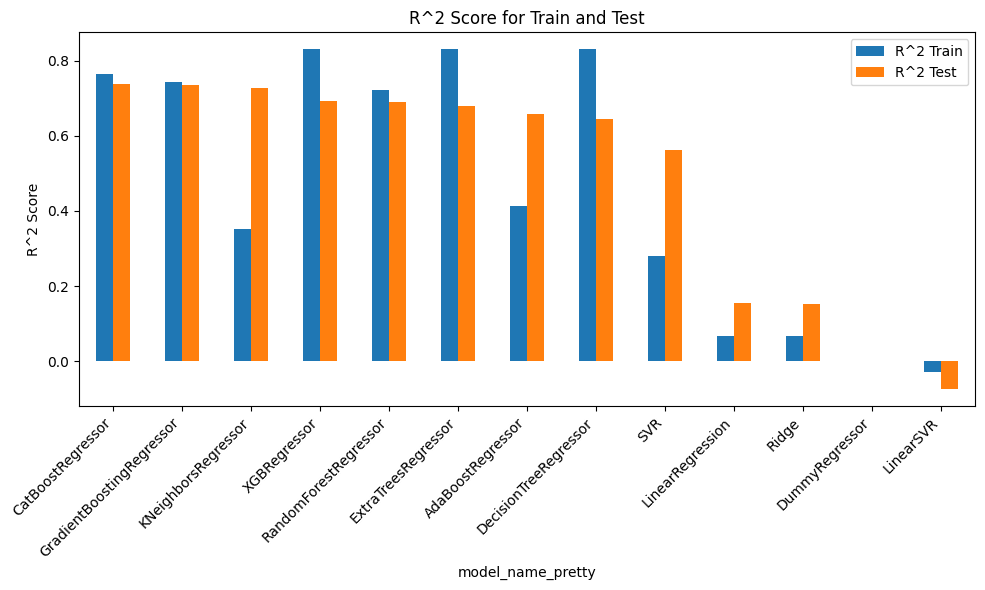

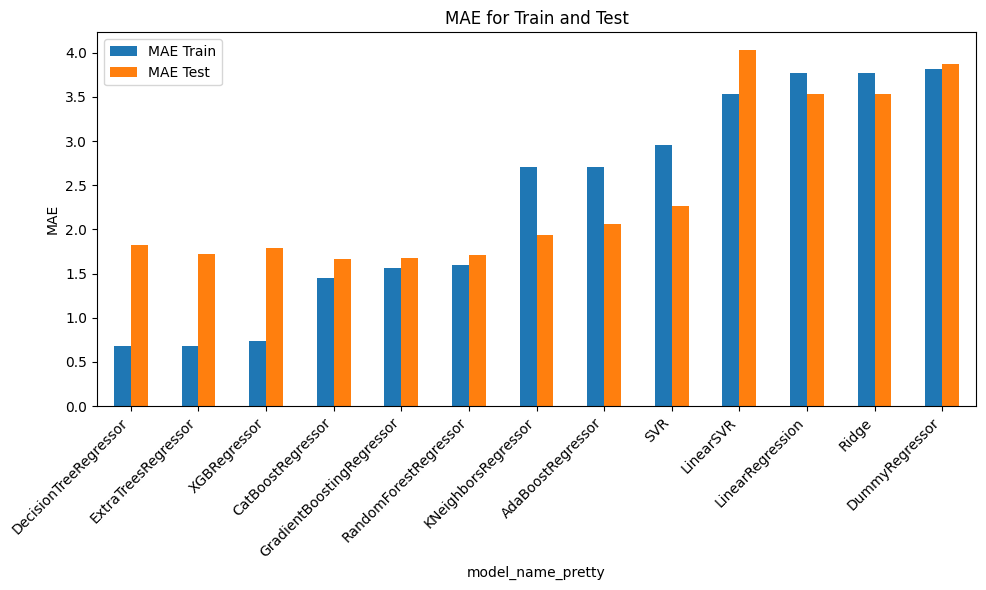

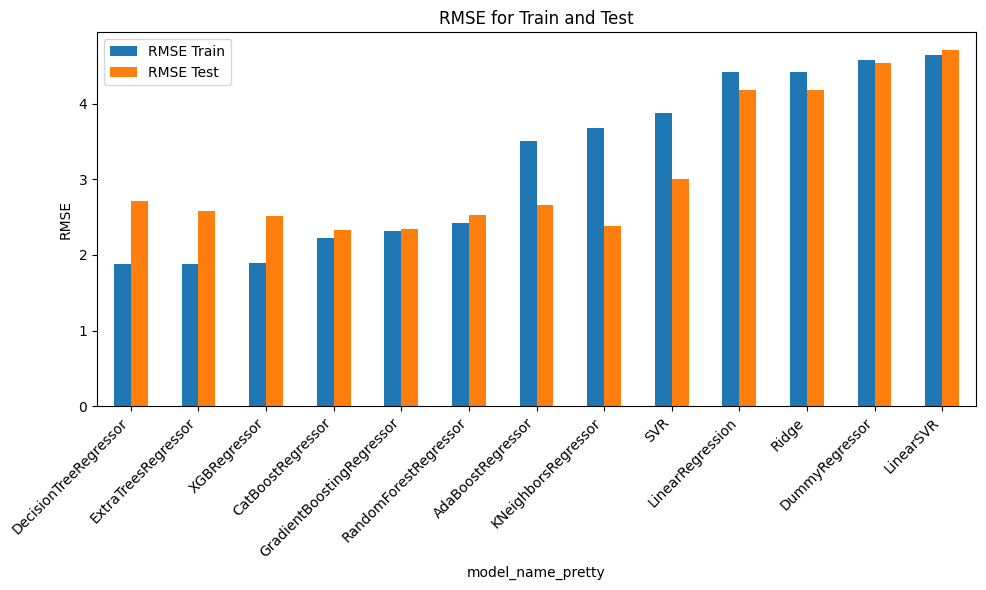

In [35]:
df_classics.set_index('model_name_pretty', inplace=True)

# R^2 Plot for train and test, sorted from highest to lowest for train
df_sorted_r2 = df_classics.sort_values('r2_val', ascending=False)
ax_r2 = df_sorted_r2[['r2_train', 'r2_val']].plot(kind='bar', figsize=(10, 6))
ax_r2.set_ylabel('R^2 Score')
ax_r2.set_title('R^2 Score for Train and Test')
ax_r2.legend(["R^2 Train", "R^2 Test"])
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('r2_score_comparison.png')
plt.show()

# MAE Plot for train and test, sorted from lowest to highest for train
df_sorted_mae = df_classics.sort_values('mae_train', ascending=True)
ax_mae = df_sorted_mae[['mae_train', 'mae_val']].plot(kind='bar', figsize=(10, 6))
ax_mae.set_ylabel('MAE')
ax_mae.set_title('MAE for Train and Test')
ax_mae.legend(["MAE Train", "MAE Test"])
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('mae_comparison.png')
plt.show()

# RMSE Plot for train and test, sorted from lowest to highest for train
df_sorted_rmse = df_classics.sort_values('rmse_train', ascending=True)
ax_rmse = df_sorted_rmse[['rmse_train', 'rmse_val']].plot(kind='bar', figsize=(10, 6))
ax_rmse.set_ylabel('RMSE')
ax_rmse.set_title('RMSE for Train and Test')
ax_rmse.legend(["RMSE Train", "RMSE Test"])
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('rmse_comparison.png')
plt.show()

In [36]:
classic_models

OrderedDict([('dumr', DummyRegressor()),
             ('rr', Ridge()),
             ('abr', AdaBoostRegressor()),
             ('gbr', GradientBoostingRegressor()),
             ('rfr', RandomForestRegressor()),
             ('etr', ExtraTreesRegressor()),
             ('DT', DecisionTreeRegressor()),
             ('KNR', KNeighborsRegressor()),
             ('svr', SVR()),
             ('lsvr', LinearSVR()),
             ('CBR', <catboost.core.CatBoostRegressor at 0x1c430586b90>),
             ('LR', LinearRegression()),
             ('XGB',
              XGBRegressor(base_score=None, booster=None, callbacks=None,
                           colsample_bylevel=None, colsample_bynode=None,
                           colsample_bytree=None, device=None, early_stopping_rounds=None,
                           enable_categorical=False, eval_metric=None, feature_types=None,
                           gamma=None, grow_policy=None, importance_type=None,
                           interaction_con

In [37]:
def plot_pred_act(act, pred, model, reg_line=True, label=''):
    xy_max = np.max([np.max(act), np.max(pred)])

    plot = plt.figure(figsize=(6,6))
    plt.plot(act, pred, 'o', ms=9, mec='k', mfc='silver', alpha=0.4)
    plt.plot([0, xy_max], [0, xy_max], 'k--', label='ideal')
    if reg_line:
        polyfit = np.polyfit(act, pred, deg=1)
        reg_ys = np.poly1d(polyfit)(np.unique(act))
        plt.plot(np.unique(act), reg_ys, alpha=0.8, label='linear fit')
    plt.axis('scaled')
    plt.xlabel(f'Actual Print Height Deviation (mm)')
    plt.ylabel(f'Predicted Print Height Deviation  (mm)')
    plt.title(f'{type(model).__name__}, r2: {r2_score(act, pred):0.4f}')
    plt.legend(loc='upper left')
    
    return plot

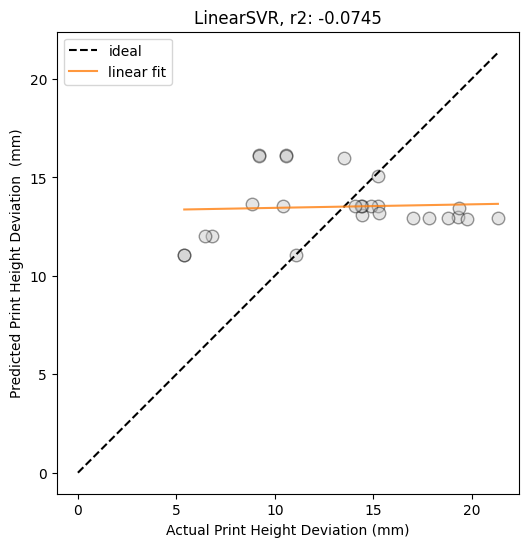

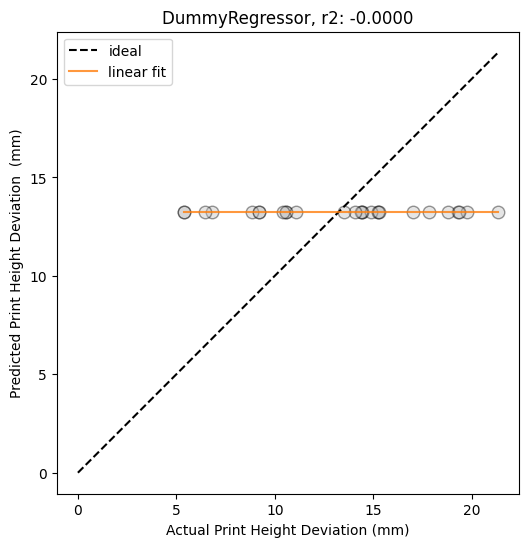

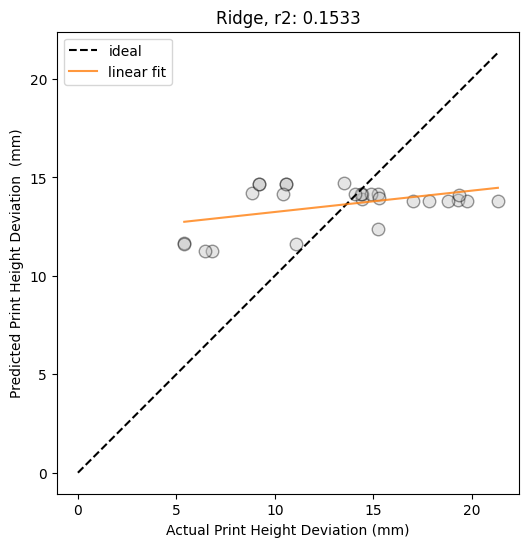

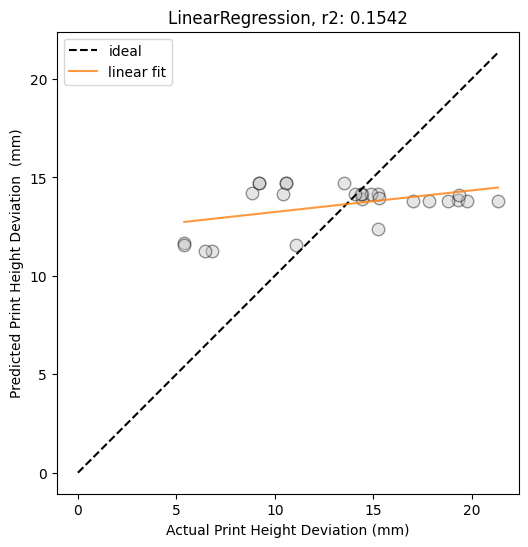

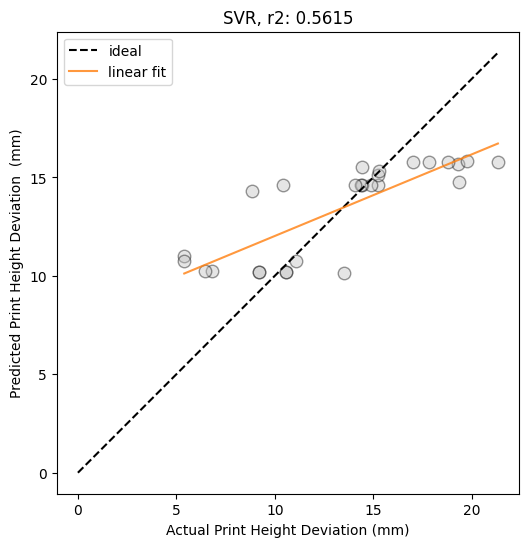

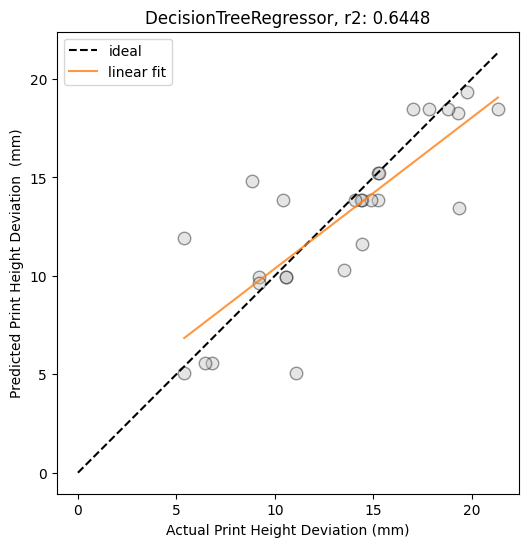

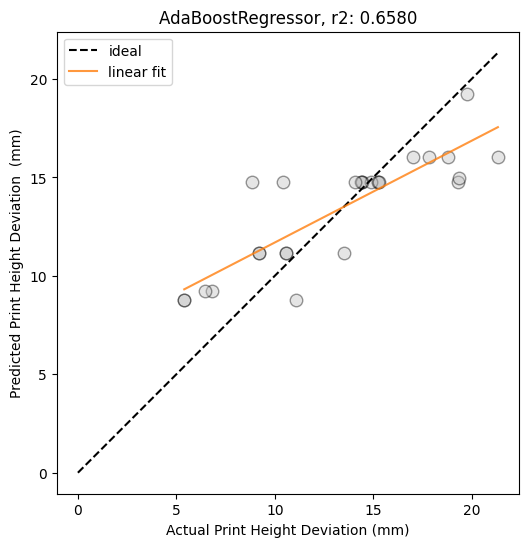

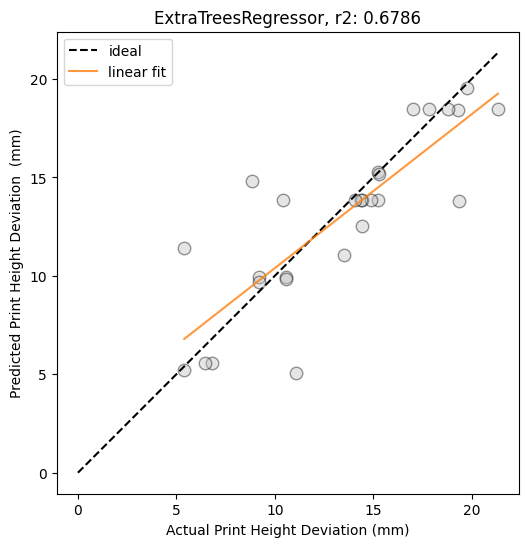

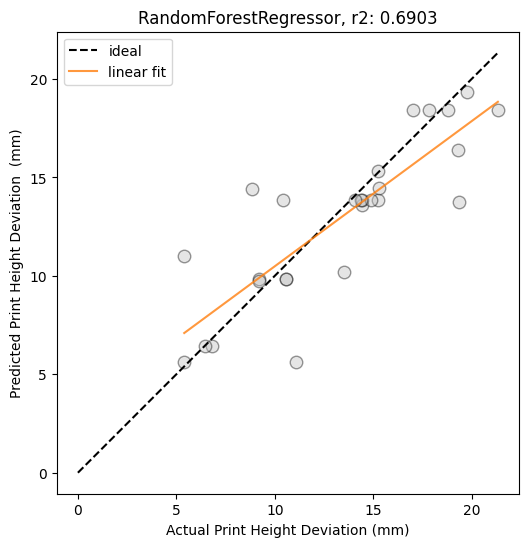

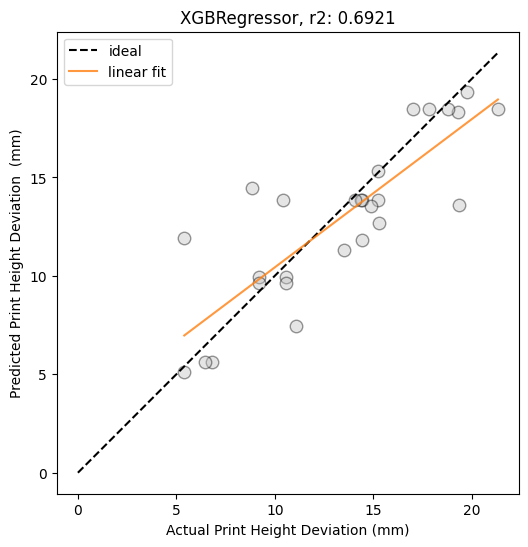

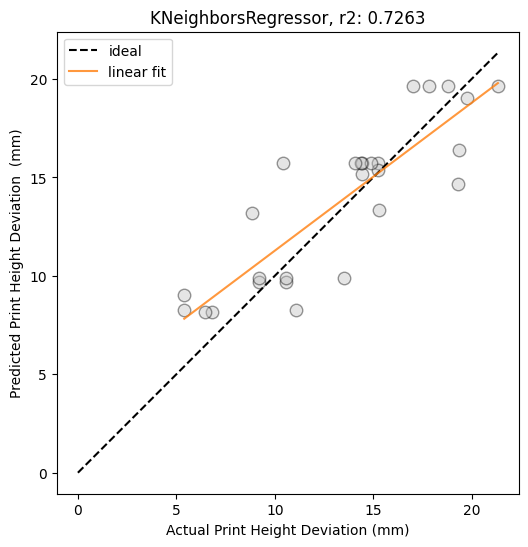

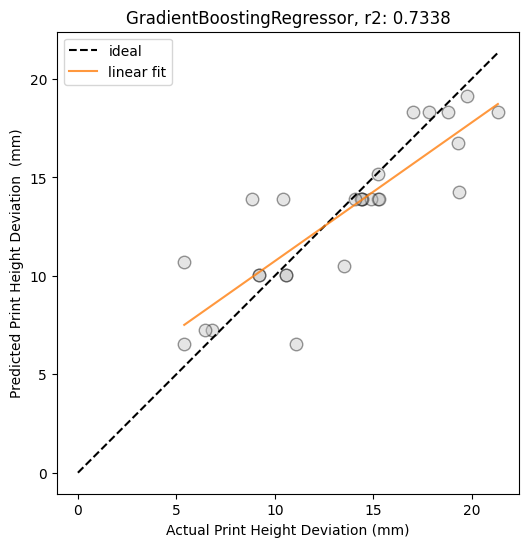

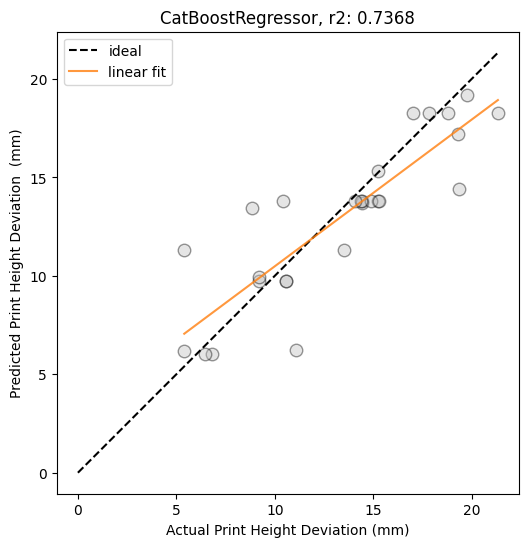

In [40]:
for row in range(df_classics.shape[0]):
    model_name = df_classics.iloc[row]['model_name']

    model = classic_models[model_name]
    y_act_val = y_val
    y_pred_val = model.predict(X_val)

    plot = plot_pred_act(y_act_val, y_pred_val, model, reg_line=True, label='$\mathrm{C}_\mathrm{p}$ (mm)')
    plt.savefig(f"{model_name}_plot.png", dpi=300, bbox_inches='tight')
    plt.show()

In [187]:
# Find the best-performing model that we have tested
best_row = df_classics.iloc[-1, :].copy()

# Get the model type and model parameters
model_name = best_row['model_name']
model_params = best_row['model_params']

# Instantiate the model again using the parameters
model = classic_model_names[model_name](**model_params)
print(model)

In [176]:
# Concatenate the train and validation datasets together
#X_train_new = np.concatenate((X_train, X_val), axis=0)
#y_train_new = pd.concat((y_train, y_val), axis=0)

#print(X_train_new.shape)